# Introduce the input and output in Python

## 1. Package import and access to OS via Python

In [1]:
# Using "import" can input packages (modules), .py files from defined paths
# 2 ways to import
import os
# os module allows you to connect with your operation system
# You can check, create, delete, rename your files and directories
# Hint: path.exists(), listdir(), mkdir(), makedirs(), remove(), removedirs(), rename(), walk()
path_direct = os.getcwd()
print(path_direct)
dir_files = os.listdir(path_direct)
print(dir_files)

C:\Users\Pleger\Desktop\DigitalEconomyDecisionAnalytics-master\DEDA_InputOutput
['.ipynb_checkpoints', 'AAPL.csv', 'AAPL_2013.json', 'DEDA_InputOutput.ipynb', 'DEDA_InputOutput.py', 'Metainfo.txt', 'README.md', 'shakespeare.txt', 'test.csv']


In [2]:
# Give the package an alias
import numpy as np

np.power(2, 10)  # 1024

1024

In [3]:
# Instead of importing whole package, import only 1 method in the package
from pandas import DataFrame

some_info = {'name': ['Alice', 'Bob', 'Clark', 'Douglas'],
             'age': [5, 10, 3, 22]}
df = DataFrame(some_info)
print(df)

      name  age
0    Alice    5
1      Bob   10
2    Clark    3
3  Douglas   22


                     1

  From fairest creatures we desire increase,That thereby beauty's rose might never die,But as the riper should by time decease,His tender heir might bear his memory:

  But thou contracted to thine own bright eyes,

  Feed'st thy light's flame with self-substantial fuel,

  Making a famine where abundance lies,

  Thy self thy foe, to thy sweet self too cruel:

  Thou that art now the world's fresh ornament,

  And only herald to the gaudy spring,

  Within thine own bud buriest thy content,

  And tender churl mak'st waste in niggarding:

    Pity the world, or else this glutton be,

    To eat the world's due, by the grave and thee.



                     2

  When forty winters shall besiege thy brow,

  And dig deep trenches in thy beauty's field,

  Thy youth's proud livery so gazed on now,

  Will be a tattered weed of small worth held:  

  Then being asked, where all thy beauty lies,

  Where all the treasure of thy lusty days;

  To say within thine ow

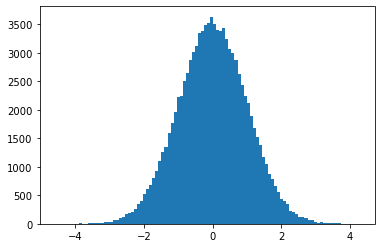

In [4]:

"""
Read and write file
"""

# Using build-in function, open(), to open the file and using close() to close the file
shakespeare = open('shakespeare.txt', 'r', encoding='utf-8')
for string in shakespeare:
    print(string)
shakespeare.close()

# In python, we usually use syntax "with open() as container_name" to load the content
# There are 3 basic containers here:
with open('shakespeare.txt', 'r') as shakespeare_read:
    # read(n) method will put n characters into a string
    shakespeare_string_10 = shakespeare_read.read(10)
    shakespeare_string = shakespeare_read.read()

with open('shakespeare.txt', 'r') as shakespeare_read:
    # readline() method will read one line once.
    print(shakespeare_read.readline(), end='*')
    print(shakespeare_read.readline(), end='*')
    print(shakespeare_read.readline(), end='*')

with open('shakespeare.txt', 'r') as shakespeare_read:
    # readlines() method will put content into a list, every line is a string in the list
    shakespeare_lines = shakespeare_read.readlines()
    print(shakespeare_lines)

for line in shakespeare_lines:
    print(line)

# Using pickle to serialize data, save as binary format
# Create a standard normal distribution data set
temp_data = np.random.normal(size=100000)
temp_data = list(temp_data)
import matplotlib.pyplot as plt

plt.hist(temp_data, 100)
import pickle

# If you are writing plain text, you can use 'w'
# If you want to save as binary format, you should use 'wb'
with open('temp.pkl', 'wb') as temp_file:
    pickle.dump(temp_data, temp_file)


(168, 5)
                low    high      open    close    volume
date                                                    
2013-01-24  450.250  465.73  460.0000  450.500  52156196
2013-01-25  435.000  456.23  451.6900  439.880  43129305
2013-04-24  392.500  415.25  393.5400  405.462  34633970
2013-04-17  398.110  420.60  420.2700  402.800  33743681
2013-08-13  468.050  494.66  470.9400  489.570  31464522
...             ...     ...       ...      ...       ...
2013-07-22  425.468  429.75  429.4600  426.310   7426793
2013-08-01  453.260  456.80  455.7527  456.676   7364089
2013-07-26  434.340  441.04  435.3000  440.990   7150442
2013-07-17  428.220  432.22  429.7000  430.310   7108579
2013-06-18  430.210  434.90  431.5600  431.770   6966282

[168 rows x 5 columns]
False
True


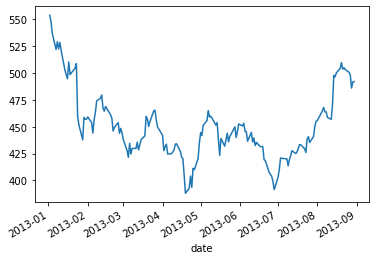

In [5]:

"""
Input and output structured data
"""
import pandas as pd
import datetime as dt

# Pandas supports most of the common structured data formats
# The read_csv method can take more arguments to satisfy your need
# For example, you can specify the delimiter and decimal style
# further more see: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
apple_stock = pd.read_csv('AAPL.csv', index_col='date', parse_dates=True)
# Pandas will read files as DataFrame type
# This is a very powerful data structure that you can do almost everything to the data.
type(apple_stock)
# For example, easily slicing rows and selecting columns
apple_stock_2013 = apple_stock.loc[apple_stock.index.year == 2013, ['low', 'high', 'open', 'close', 'volume']]

# shape of DataFrame
print(apple_stock_2013.shape)

# sorting by value
apple_stock_2013.sort_values(by='volume', ascending=False, inplace=True)
print(apple_stock_2013)

# check monotonicity increasing through time
print(apple_stock_2013.index.is_monotonic_increasing)

# sorting by index
apple_stock_2013.sort_index(axis=0, ascending=True, inplace=True)

# reset index as numeric
apple_stock_2013.reset_index(drop=False, inplace=True)

# add a row
new_row_1 = {'date': dt.datetime(2013, 8, 31), 'low': 500, 'high': 510}
apple_stock_2013 = apple_stock_2013.append(new_row_1, ignore_index=True)

# Check null values
nan_rows = apple_stock_2013[apple_stock_2013['open'].isna()]

# remove null values
apple_stock_2013.dropna(axis=0, how='any', subset=['volume', 'close'], inplace=True)

# duplicate a row
new_row = {'date': dt.datetime(2013, 8, 30)}
apple_stock_2013 = apple_stock_2013.append(new_row, ignore_index=True)
apple_stock_2013.fillna(method='ffill', inplace=True)

# set a column as index
apple_stock_2013.set_index(keys='date', drop=True, append=False, inplace=True)

# duplicates timestamp operations
print(apple_stock_2013.index.has_duplicates)
apple_stock_2013.index.duplicated()

# operation
# way1, potential risk
way1 = apple_stock_2013.drop_duplicates(keep='first', subset=['low', 'high', 'open', 'close', 'volume'])
# way2, drop by index, row operation
apple_stock_2013 = apple_stock_2013[~ (apple_stock_2013.index.duplicated())]  # ~, take inverse

# a simple build-in plot function of pandas
apple_stock_2013['open'].plot()

# Save the new data as json format
apple_stock_2013.to_json('AAPL_2013.json')
apple_stock_2013.to_csv('test.csv')
